In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet

from sklearn.metrics import mean_squared_error

For comparing across ML models (i.e. RF, GB, LR), sample 20% and do 10-fold CV.
Use default parameters for this.

For the top 2 models, use 60% of data to perform hyperparameter search.

For each model, we want the best set of parameters. 

Output: Optimal parameters, as well as loss for each combination of parameters. Output: 10 different loss values/RMSE per model (boxplot) 

In [2]:
train = pd.read_csv("../data/processed/train.csv")
print(train.shape)
train.head()

(431732, 88)


,Unnamed: 0,floor_area_sqm,resale_price,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,...,mall_nearest_dist,hawker_nearest_dist,comm_nearest_dist,station_nearest_dist,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k
0,0,118.0,209700.0,12,2.0,0,0,0,0,0,...,1.032567,0.944966,2.312122,1.136808,5,6,1,2,1,1
1,1,110.0,402300.0,11,11.0,0,0,0,1,0,...,0.805534,3.780019,1.461516,0.823036,6,8,4,0,0,2
2,2,112.0,351000.0,16,2.0,0,0,0,0,0,...,0.452272,1.802808,1.444013,2.229299,1,2,2,0,0,0
3,3,67.0,151200.0,20,8.0,0,0,0,0,0,...,0.456213,0.617904,2.385591,0.423055,2,2,3,2,0,1
4,4,73.0,318600.0,28,8.0,0,0,0,0,0,...,0.763692,0.761443,1.805955,0.773734,2,2,1,1,0,1


In [3]:
train = train.drop(columns=['Unnamed: 0'])
train

,floor_area_sqm,resale_price,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,flat_model_maisonette,...,mall_nearest_dist,hawker_nearest_dist,comm_nearest_dist,station_nearest_dist,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k
0,118.0,209700.0,12,2.0,0,0,0,0,0,0,...,1.032567,0.944966,2.312122,1.136808,5,6,1,2,1,1
1,110.0,402300.0,11,11.0,0,0,0,1,0,0,...,0.805534,3.780019,1.461516,0.823036,6,8,4,0,0,2
2,112.0,351000.0,16,2.0,0,0,0,0,0,0,...,0.452272,1.802808,1.444013,2.229299,1,2,2,0,0,0
3,67.0,151200.0,20,8.0,0,0,0,0,0,0,...,0.456213,0.617904,2.385591,0.423055,2,2,3,2,0,1
4,73.0,318600.0,28,8.0,0,0,0,0,0,0,...,0.763692,0.761443,1.805955,0.773734,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,101.0,238500.0,5,2.0,0,0,0,0,0,0,...,0.201474,1.473613,1.039111,0.964207,3,5,2,0,0,1
431728,95.0,376200.0,4,14.0,0,0,0,0,0,0,...,0.191319,1.851253,1.607570,2.068516,1,2,3,0,0,0
431729,67.0,255600.0,25,2.0,0,0,0,0,0,0,...,0.767073,0.723587,1.223247,1.160647,3,4,1,1,0,0
431730,123.0,508500.0,14,17.0,0,0,0,1,0,0,...,0.480181,2.584299,1.624778,0.613543,4,5,3,0,0,2


In [4]:
test = pd.read_csv("../data/processed/test.csv")
print(test.shape)
test.head()

(107934, 87)


,Unnamed: 0,floor_area_sqm,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,flat_model_maisonette,...,mall_nearest_dist,hawker_nearest_dist,comm_nearest_dist,station_nearest_dist,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k
0,0,94.0,15,5.0,0,0,0,0,0,0,...,0.693506,0.792309,1.749017,0.667130,4,3,2,2,1,2
1,1,122.0,4,5.0,0,0,0,1,0,0,...,1.932765,2.069274,1.818631,1.832348,3,2,0,0,0,0
2,2,67.0,20,2.0,0,0,0,0,0,0,...,0.524283,0.787872,0.928551,0.517931,1,2,4,1,1,1
3,3,82.0,34,5.0,0,0,0,0,0,0,...,0.828608,0.957000,2.026039,0.546579,3,2,3,3,0,1
4,4,117.0,26,2.0,0,0,0,0,0,0,...,0.604285,0.112928,1.826417,0.515554,5,2,3,2,0,1


In [5]:
test = test.drop(columns=['Unnamed: 0'])
test

,floor_area_sqm,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,flat_model_maisonette,flat_model_model a,...,mall_nearest_dist,hawker_nearest_dist,comm_nearest_dist,station_nearest_dist,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k
0,94.0,15,5.0,0,0,0,0,0,0,0,...,0.693506,0.792309,1.749017,0.667130,4,3,2,2,1,2
1,122.0,4,5.0,0,0,0,1,0,0,0,...,1.932765,2.069274,1.818631,1.832348,3,2,0,0,0,0
2,67.0,20,2.0,0,0,0,0,0,0,0,...,0.524283,0.787872,0.928551,0.517931,1,2,4,1,1,1
3,82.0,34,5.0,0,0,0,0,0,0,0,...,0.828608,0.957000,2.026039,0.546579,3,2,3,3,0,1
4,117.0,26,2.0,0,0,0,0,0,0,0,...,0.604285,0.112928,1.826417,0.515554,5,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,110.0,5,11.0,0,0,0,1,0,0,0,...,0.533432,0.732620,2.421703,1.555273,2,2,2,1,0,0
107930,102.0,7,14.0,0,0,0,0,0,0,1,...,0.906510,0.151803,2.592430,0.348201,0,0,1,3,0,1
107931,68.0,21,8.0,0,0,0,1,0,0,0,...,0.064781,0.688814,0.461844,0.292809,1,0,15,1,2,2
107932,104.0,21,11.0,0,0,0,0,0,0,1,...,1.107072,1.122422,1.126788,2.083779,1,2,0,0,0,0


In [6]:
y = train.resale_price
X = train.drop(columns=['resale_price'])
predictors = X.columns
print(X.shape)
print(y.shape)

(431732, 86)
(431732,)


In [7]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(345385, 86)
(345385,)
(86347, 86)
(86347,)


In [8]:
seed = 42
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.75, random_state=seed)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(86346, 86)
(86346,)
(86347, 86)
(86347,)


In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
%%time

metrics = ['neg_root_mean_squared_error']
cv_split = 10
models = []
models.append(('EN', ElasticNet()))
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor(random_state=seed)))
models.append(('GB', GradientBoostingRegressor(random_state=seed)))

names = []
rmse_list = []

for name, model in models:
    cv_score = cross_validate(model, X_train, y_train, cv=cv_split, n_jobs=-1, scoring=metrics)
    rmse = cv_score['test_neg_root_mean_squared_error'] * -1
    rmse_list.append(rmse)
    names.append(name)
    msg = f'{name} rmse: {rmse.mean():.3f} (range {rmse.min():.3f}-{rmse.max():.3f})'
    print(msg)

EN rmse: 89834.601 (range 88498.909-90911.707)
LR rmse: 40190.385 (range 39400.590-40539.493)
RF rmse: 26620.824 (range 25777.095-27371.299)
GB rmse: 50299.515 (range 49358.394-51562.181)
CPU times: user 403 ms, sys: 466 ms, total: 869 ms
Wall time: 15min 12s


In [12]:
rmse_list

[array([90379.3014589 , 89468.97318363, 90508.0026508 , 90911.70745331,
        90017.14884438, 88498.90886642, 90263.54847842, 89566.78935914,
        88743.25341317, 89988.37159464]),
 array([39920.52206173, 40102.76247593, 40539.49293819, 40509.6129959 ,
        40519.2088351 , 39400.58968127, 39851.33296748, 40307.9471225 ,
        40293.91216319, 40458.46992789]),
 array([26546.36772166, 26992.21779276, 27371.29907174, 26383.81967558,
        27117.85754766, 25777.09495421, 26298.80839631, 26946.66204756,
        26504.20168154, 26269.91338977]),
 array([49358.39383634, 50426.2242718 , 51562.18101316, 51096.07747891,
        49791.23630173, 49774.31061388, 50529.06678951, 49710.72854655,
        50169.31032017, 50577.620687  ])]

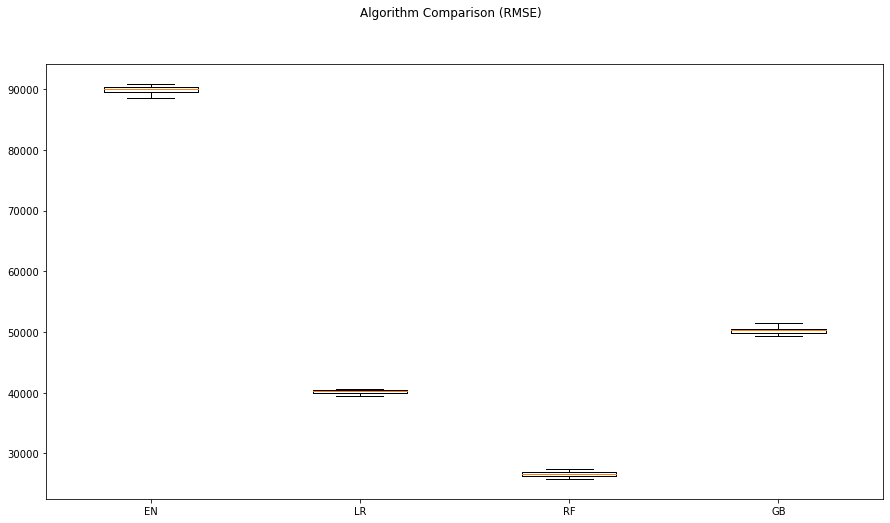

In [13]:
plt.rcParams["figure.figsize"] = (15, 8)
fig = plt.figure()
fig.suptitle('Algorithm Comparison (RMSE)')
ax = fig.add_subplot(111)
plt.boxplot(rmse_list)
ax.set_xticklabels(names)
plt.show()

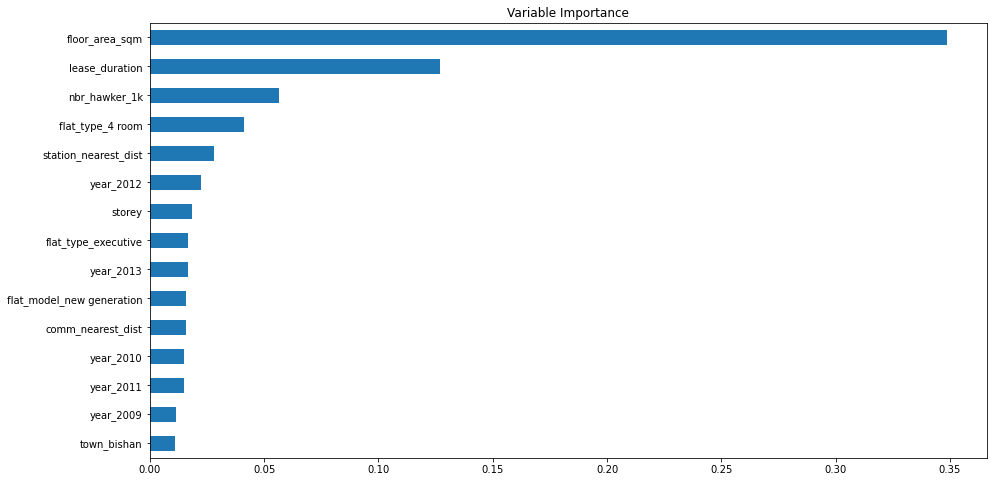

In [14]:
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plt.rcParams["figure.figsize"] = (15, 8)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh')
plt.title('Variable Importance')
plt.show()

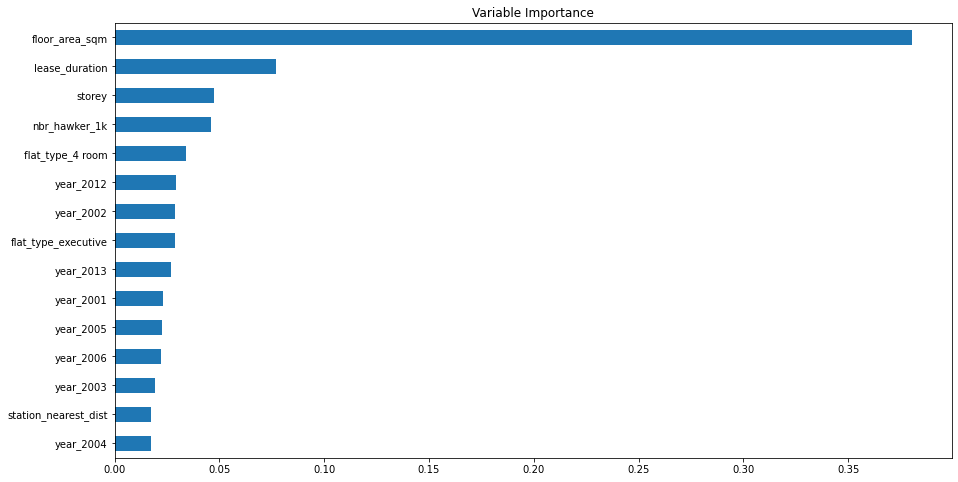

In [15]:
gb = GradientBoostingRegressor(random_state=seed)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
plt.rcParams["figure.figsize"] = (15, 8)
feat_imp = pd.Series(gb.feature_importances_, predictors).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh')
plt.title('Variable Importance')
plt.show()